In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

In [2]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start = start, end = end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3866.0,2.158088e+04,2.485206e+04,1.781030e+02,1.735445e+03,9.668136e+03,3.507399e+04,1.061463e+05
High,BTC-USD,3866.0,2.203897e+04,2.536318e+04,2.117310e+02,1.794530e+03,9.835382e+03,3.604322e+04,1.091149e+05
Low,BTC-USD,3866.0,2.105600e+04,2.427521e+04,1.715100e+02,1.668068e+03,9.462911e+03,3.387792e+04,1.052917e+05
Open,BTC-USD,3866.0,2.156032e+04,2.483524e+04,1.768970e+02,1.724600e+03,9.667167e+03,3.504768e+04,1.061473e+05
Volume,BTC-USD,3866.0,1.927495e+10,2.083030e+10,5.914570e+06,7.352435e+08,1.542065e+10,3.048244e+10,3.509679e+11


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3866 entries, 2014-09-17 to 2025-04-17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3866 non-null   float64
 1   (High, BTC-USD)    3866 non-null   float64
 2   (Low, BTC-USD)     3866 non-null   float64
 3   (Open, BTC-USD)    3866 non-null   float64
 4   (Volume, BTC-USD)  3866 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 181.2 KB


In [6]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [7]:
#close price data
closing_price = stock_data[['Close']]

In [8]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-04-13,83684.976562
2025-04-14,84542.390625
2025-04-15,83668.992188


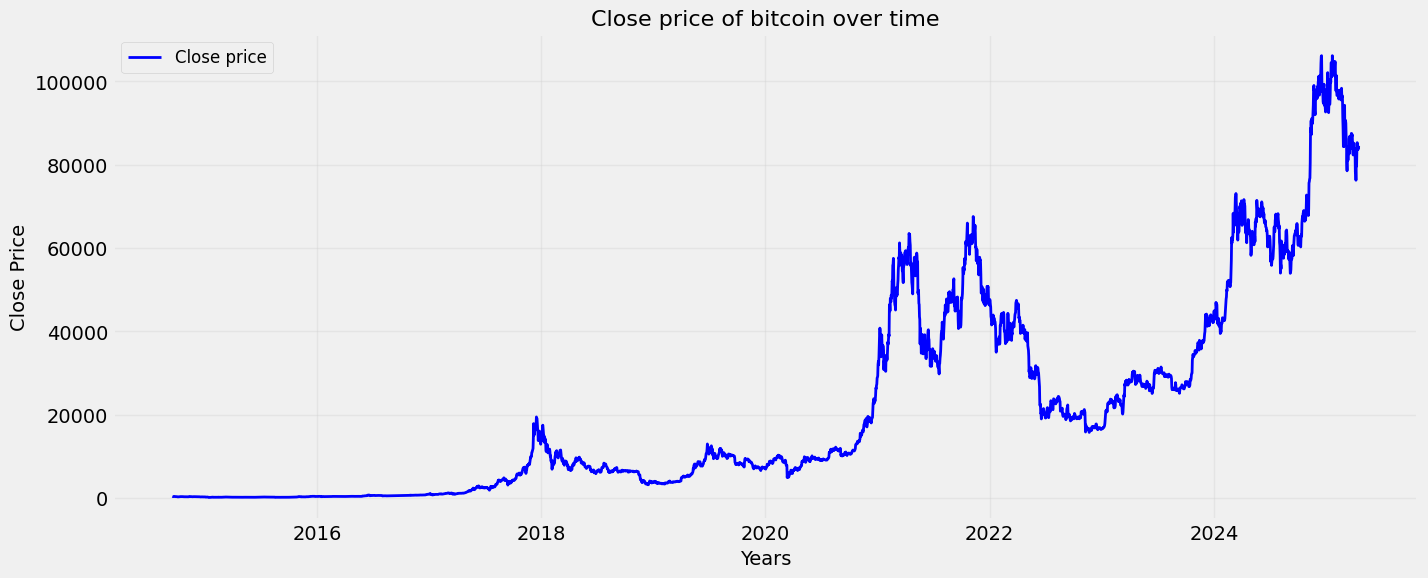

In [9]:
#PLot closing price with enchacement
plt.figure(figsize= (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close price', color = 'blue', linewidth = 2)
plt.title('Close price of bitcoin over time', fontsize = 16)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [10]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [11]:
df1 = pd.DataFrame(temp_data)

In [12]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,52.0
7,64.0
8,76.0


In [13]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [14]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365). mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100). mean()

C:\Users\kisho\AppData\Local\Temp\ipykernel_15752\2438109794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365). mean()
C:\Users\kisho\AppData\Local\Temp\ipykernel_15752\2438109794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100). mean()


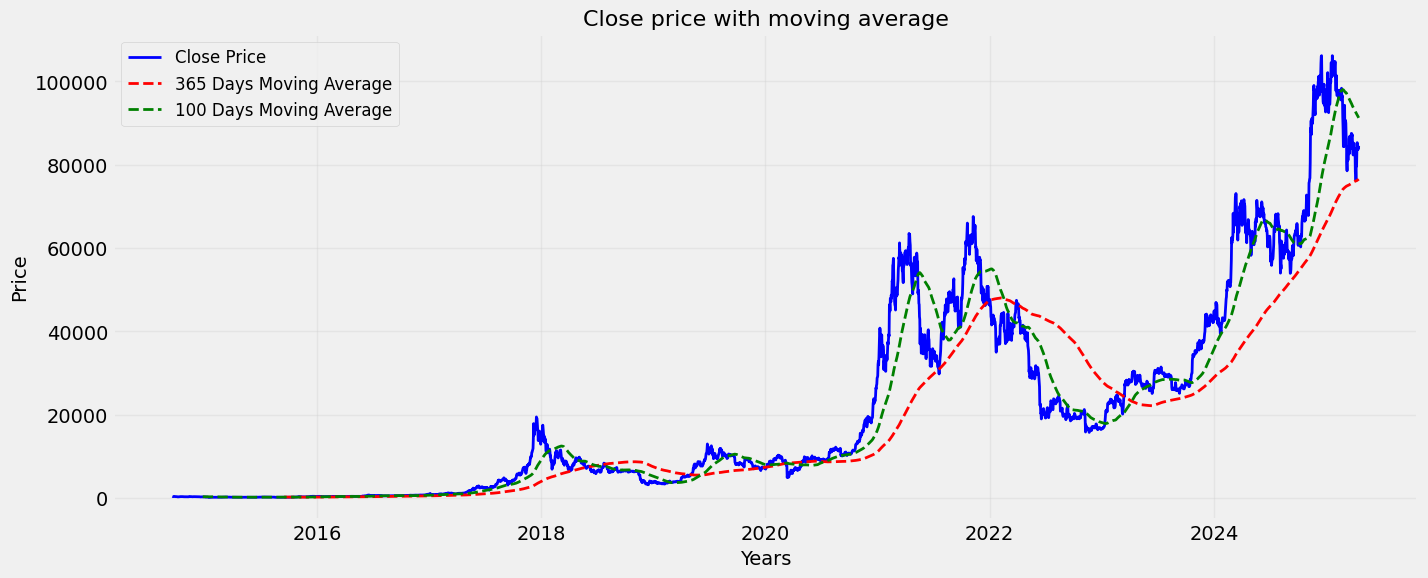

In [15]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [16]:
# LSTM -> Long short term memory
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [17]:
len(scaled_data)

3866

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [19]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [20]:
# split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]


In [21]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary() 

C:\Users\kisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - loss: 0.0013
Epoch 2/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 58s 86ms/step - loss: 2.6725e-04
Epoch 3/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 58s 85ms/step - loss: 1.8006e-04
Epoch 4/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - loss: 1.5879e-04
Epoch 5/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 56s 82ms/step - loss: 1.5982e-04
Epoch 6/10
678/678 ━━━━━━━━━━━━━━━━━━━━ 54s 79ms/step - loss: 1.6770e-04
Epoch 7/10
319/678 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - loss: 1.1834e-04

In [ ]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

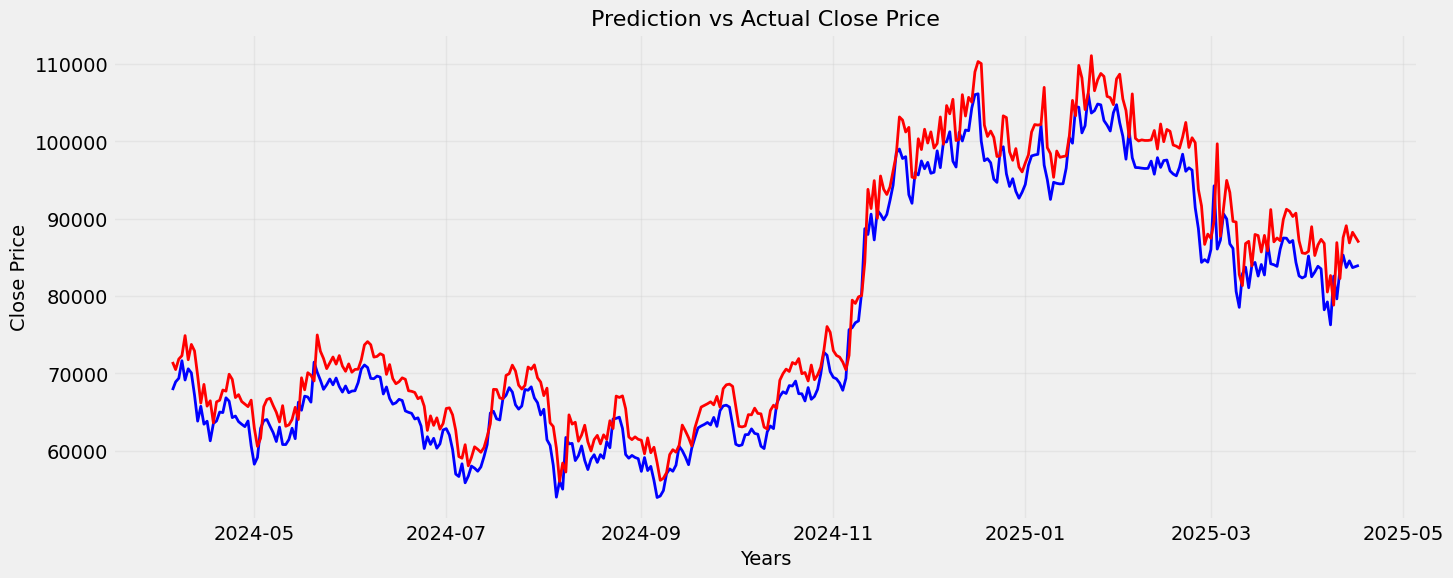

In [ ]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend

In [ ]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [ ]:
future_predictions

[array([[87427.09]], dtype=float32),
 array([[91559.125]], dtype=float32),
 array([[95986.92]], dtype=float32),
 array([[100748.055]], dtype=float32),
 array([[105859.67]], dtype=float32),
 array([[111307.305]], dtype=float32),
 array([[117059.68]], dtype=float32),
 array([[123075.38]], dtype=float32),
 array([[129304.16]], dtype=float32),
 array([[135686.25]], dtype=float32)]

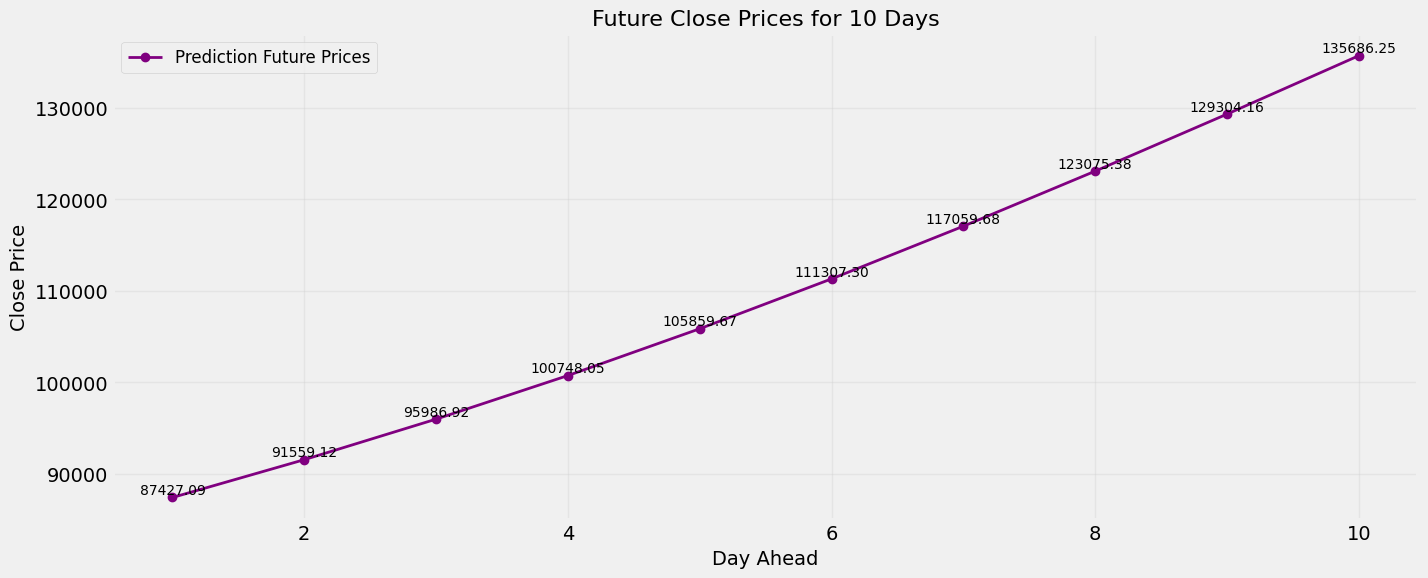

In [ ]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
model.save("model.keras")